In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf


s3= boto3.resource('s3')
bucket_name= 'morgangant-bata-445-bucket'
bucket= s3.Bucket(bucket_name)

file_key= 'CarPrice_Assignment.csv'

bucket_object= bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#reading the datefile
car_price = pd.read_csv(file_content_stream)
car_price.head()

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
#Defining the input and target variables
x= car_price[['wheelbase', 'enginesize', 'horsepower', 'compressionratio', 'peakrpm', 'citympg']]
y= car_price['price']

#Splitting the data 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

In [3]:
#Min-Max transformation
scaler= MinMaxScaler()

x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

In [6]:
#First define the model
md1= tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_dim= 6, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

#define how model will be estimated
md1.compile(optimizer= 'adam', loss='mse')
history= md1.fit(x_train, y_train, epochs= 100, batch_size= 100, validation_data= (x_test, y_test))

Epoch 1/100
2/2 [==============================] - 0s 48ms/step - loss: 248413312.0000 - val_loss: 205221392.0000
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 248412992.0000 - val_loss: 205221072.0000
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 248412656.0000 - val_loss: 205220736.0000
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 248412336.0000 - val_loss: 205220400.0000
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 248412016.0000 - val_loss: 205220080.0000
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 248411664.0000 - val_loss: 205219696.0000
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 248411328.0000 - val_loss: 205219344.0000
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 248410960.0000 - val_loss: 205218960.0000
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 248410608.0000 -

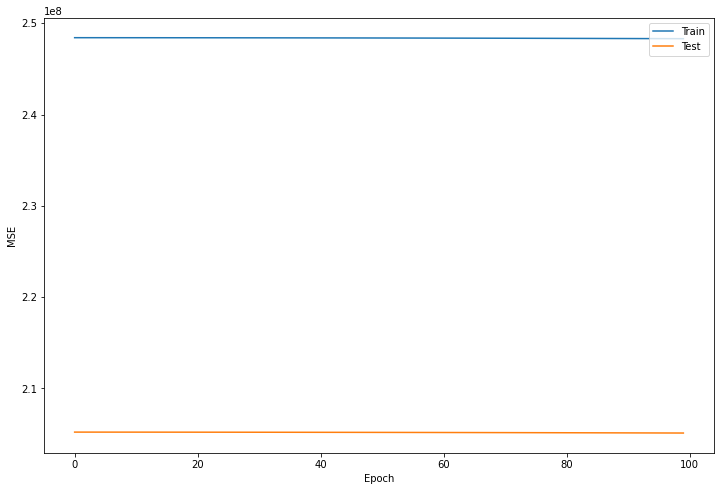

In [13]:
import matplotlib.pyplot as plt

fig= plt.figure(figsize = (12,8) )

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'], loc= 'upper right')
plt.show()

In [14]:
md1.evaluate(x_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 205119808.0000


205119808.0

In [ ]:
#Second Model

In [17]:
md2= tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_dim= 6, activation= 'relu'),
    tf.keras.layers.Dense(8, activation= 'relu'),
    tf.keras.layers.Dense(1)

])

#define how model will be estimated
md2.compile(optimizer= 'adam', loss='mse')
history= md2.fit(x_train, y_train, epochs= 100, batch_size= 100, validation_data= (x_test, y_test))

Epoch 1/100
2/2 [==============================] - 0s 61ms/step - loss: 248419104.0000 - val_loss: 205227872.0000
Epoch 2/100
2/2 [==============================] - 0s 17ms/step - loss: 248418752.0000 - val_loss: 205227552.0000
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 248418400.0000 - val_loss: 205227216.0000
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 248418048.0000 - val_loss: 205226896.0000
Epoch 5/100
2/2 [==============================] - 0s 20ms/step - loss: 248417648.0000 - val_loss: 205226560.0000
Epoch 6/100
2/2 [==============================] - 0s 19ms/step - loss: 248417280.0000 - val_loss: 205226192.0000
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 248416848.0000 - val_loss: 205225840.0000
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 248416400.0000 - val_loss: 205225424.0000
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 248415952.0000 -

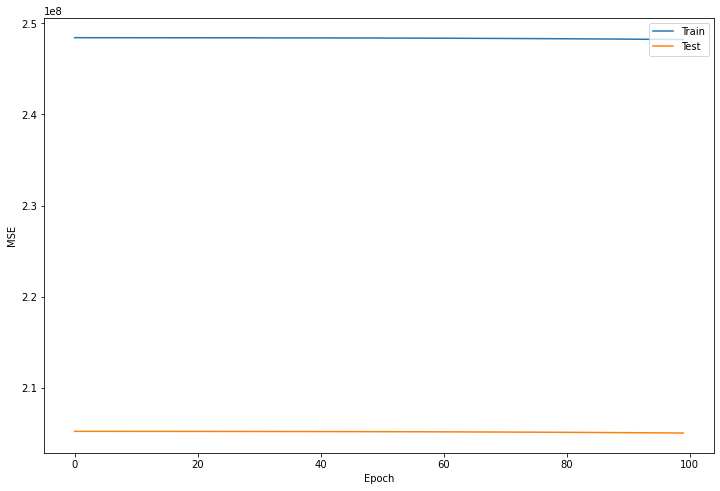

In [18]:
#Visulization
fig= plt.figure(figsize = (12,8) )

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'], loc= 'upper right')
plt.show()

In [19]:
md2.evaluate(x_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 205042160.0000


205042160.0

In [ ]:
#When comparing Models, Model 2 has a smaller MSE
#205119808.0
#205042160.0
